In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [6]:
df = pd.read_excel('K-means_Data.xlsx')
df.head(11)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     26 non-null     object
 1   roll_no  26 non-null     int64 
 2   marks    26 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 756.0+ bytes


Text(0, 0.5, 'Marks')

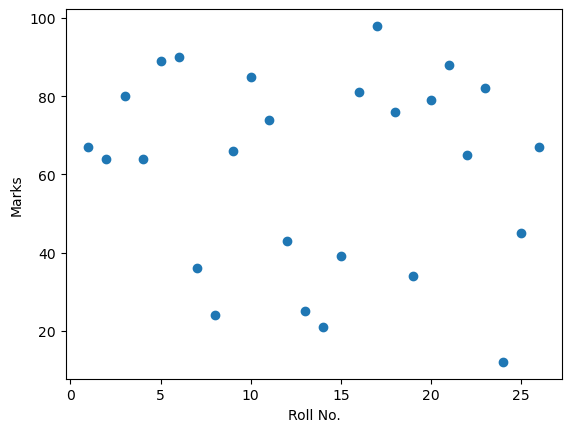

In [7]:
plt.scatter(df.roll_no,df['marks'])
plt.xlabel("Roll No.")
plt.ylabel("Marks")

In [10]:
km = KMeans(n_clusters=3)
data = df[['roll_no', 'marks']]
predicted = km.fit_predict(data)
print(predicted)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 2 0 2 2 1 1 0 2 0 1 1 1 1 2 2 2 1 2 2 0 2 1 1 0]


In [13]:
df['clusters'] = predicted
df1 = df[df.clusters ==0]
df2 = df[df.clusters ==1]
df3 = df[df.clusters ==2]
df1

,name,roll_no,marks,clusters
0,A,1,67,0
1,B,2,64,0
3,D,4,64,0
8,I,9,66,0
10,K,11,74,0
21,V,22,65,0
25,Z,26,67,0


In [14]:
df2

,name,roll_no,marks,clusters
6,G,7,36,1
7,H,8,24,1
11,L,12,43,1
12,M,13,25,1
13,N,14,21,1
14,O,15,39,1
18,S,19,34,1
23,X,24,12,1
24,Y,25,45,1


In [15]:
df3

,name,roll_no,marks,clusters
2,C,3,80,2
4,E,5,89,2
5,F,6,90,2
9,J,10,85,2
15,P,16,81,2
16,Q,17,98,2
17,R,18,76,2
19,T,20,79,2
20,U,21,88,2
22,W,23,82,2


Text(0, 0.5, 'Marks')

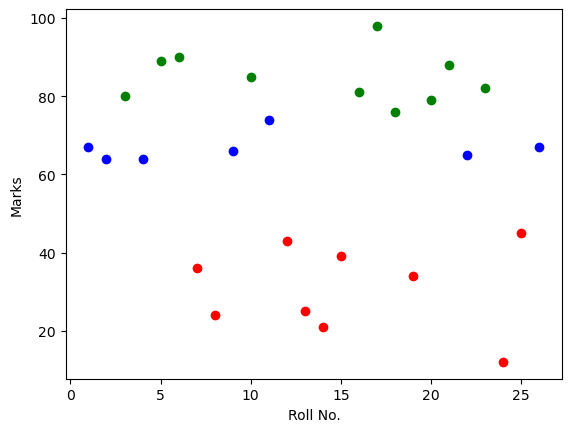

In [27]:
plt.scatter(df1.roll_no,df1['marks'],color='blue')
plt.scatter(df2.roll_no,df2['marks'],color='red')
plt.scatter(df3.roll_no,df3['marks'],color='green')
plt.xlabel("Roll No.")
plt.ylabel("Marks")

In [38]:
scale = MinMaxScaler()
scale.fit(df[['marks']])
df['marks'] = scale.transform(df[['marks']])
scale.fit(df[['roll_no']])
df['marks'] = scale.transform(df[['roll_no']])

In [39]:
km = KMeans(n_clusters=3)
data = df[['roll_no', 'marks']]
predicted = km.fit_predict(data)
print(predicted)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0]


In [42]:
df.drop(['clusters'],axis=1)
df.head()

,name,roll_no,marks,clusters
0,A,1,0.00,0
1,B,2,0.04,0
2,C,3,0.08,2
3,D,4,0.12,0
4,E,5,0.16,2


In [43]:
df['clusters'] = predicted
df1 = df[df.clusters ==0]
df2 = df[df.clusters ==1]
df3 = df[df.clusters ==2]
df1

,name,roll_no,marks,clusters
18,S,19,0.72,0
19,T,20,0.76,0
20,U,21,0.80,0
21,V,22,0.84,0
22,W,23,0.88,0
23,X,24,0.92,0
24,Y,25,0.96,0
25,Z,26,1.00,0


Text(0, 0.5, 'Marks')

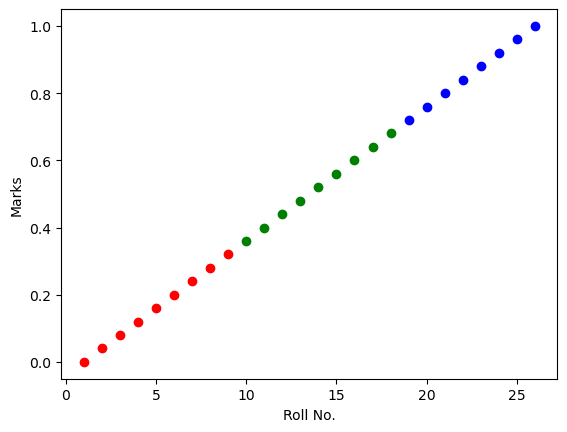

In [44]:
plt.scatter(df1.roll_no,df1['marks'],color='blue')
plt.scatter(df2.roll_no,df2['marks'],color='red')
plt.scatter(df3.roll_no,df3['marks'],color='green')
plt.xlabel("Roll No.")
plt.ylabel("Marks")

In [48]:
km.cluster_centers_

array([[22.5 ,  0.86],
       [ 5.  ,  0.16],
       [14.  ,  0.52]])

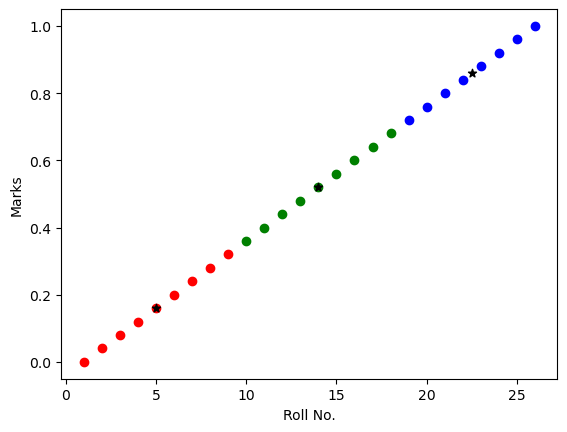

In [54]:
plt.scatter(df1.roll_no,df1['marks'],color='blue')
plt.scatter(df2.roll_no,df2['marks'],color='red')
plt.scatter(df3.roll_no,df3['marks'],color='green')
plt.xlabel("Roll No.")
plt.ylabel("Marks")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='black', marker="*")